In [1]:
library(tidyverse)
library(glue)
install.packages("Hmisc")
library(ggplot2)
library(dplyr)


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

In [2]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/pseudodose"

In [3]:
color_dict <- c("pred" = "#B12F8C", "True" = "#3F8AA6")

In [4]:
data_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/analysis/sciplex"
fig_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/pseudodose"

In [5]:
df_upregulation <- read_csv(file.path(data_dir, "upregulated_data_Dacinostat.csv"))
df_downregulation <- read_csv(file.path(data_dir, "downregulated_data_Dacinostat.csv"))

New names:
• `` -> `...1`
Rows: 7067 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ...1, mode
dbl (11): COL26A1, CEACAM22P, PPM1E, RPL3L, TEX14, AC008050.1, LINC00624, AC...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 7067 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ...1, mode
dbl (11): GFRA1, PLXDC2, DSCAM, SLC24A3, SULF2, MALRD1, AC112206.2, CALCR, A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
df_upregulation <- df_upregulation %>% filter(logdose!=0)

In [7]:
df_downregulation <- df_downregulation %>% filter(logdose!=0)

In [8]:
upregulated_genes <- colnames(df_upregulation)[2:11]

In [9]:
downregulated_genes <- colnames(df_downregulation)[2:11]

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


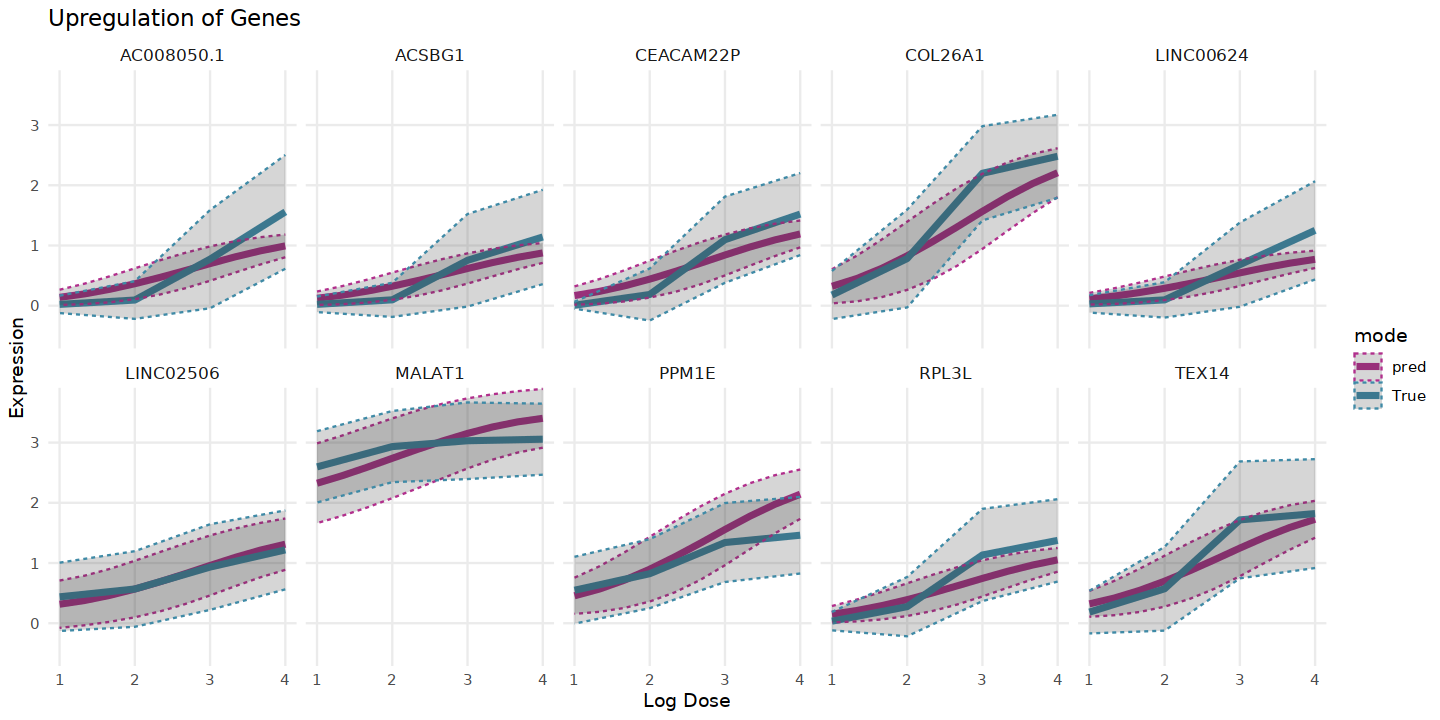

In [10]:
options(repr.plot.width = 12, repr.plot.height = 6)

df_long <- df_upregulation %>%
  pivot_longer(cols = all_of(upregulated_genes), names_to = "gene", values_to = "expression")

# Plot
p <- ggplot(df_long, aes(x = logdose, y = expression, color = mode)) +
  geom_line(stat = "summary", fun = mean, size=1.5) +
  geom_ribbon(stat = "summary", fun.data = mean_sdl, fun.args = list(mult = 1), alpha = 0.2, linetype = "dashed") +
  facet_wrap(~ gene, ncol = 5) +
  theme_minimal() +
  labs(title = "Upregulation of Genes", x = "Log Dose", y = "Expression") +
  scale_color_manual(values = color_dict) +
  coord_cartesian(ylim = c(-0.5, 3.7)) +
  theme(
    strip.text = element_text(size = 10),
    panel.grid.major = element_line(size = 0.5), # Adjust major grid line size (thicker or thinner)
    panel.grid.minor = element_blank()          # Remove minor grid lines
  )
ggsave(file.path(output_dir, "upregulation_genes.pdf"), plot = p, device = "pdf", width = 12, height = 6)
p

In [11]:
df_long <- df_downregulation %>%
  pivot_longer(cols = all_of(downregulated_genes), names_to = "gene", values_to = "expression")


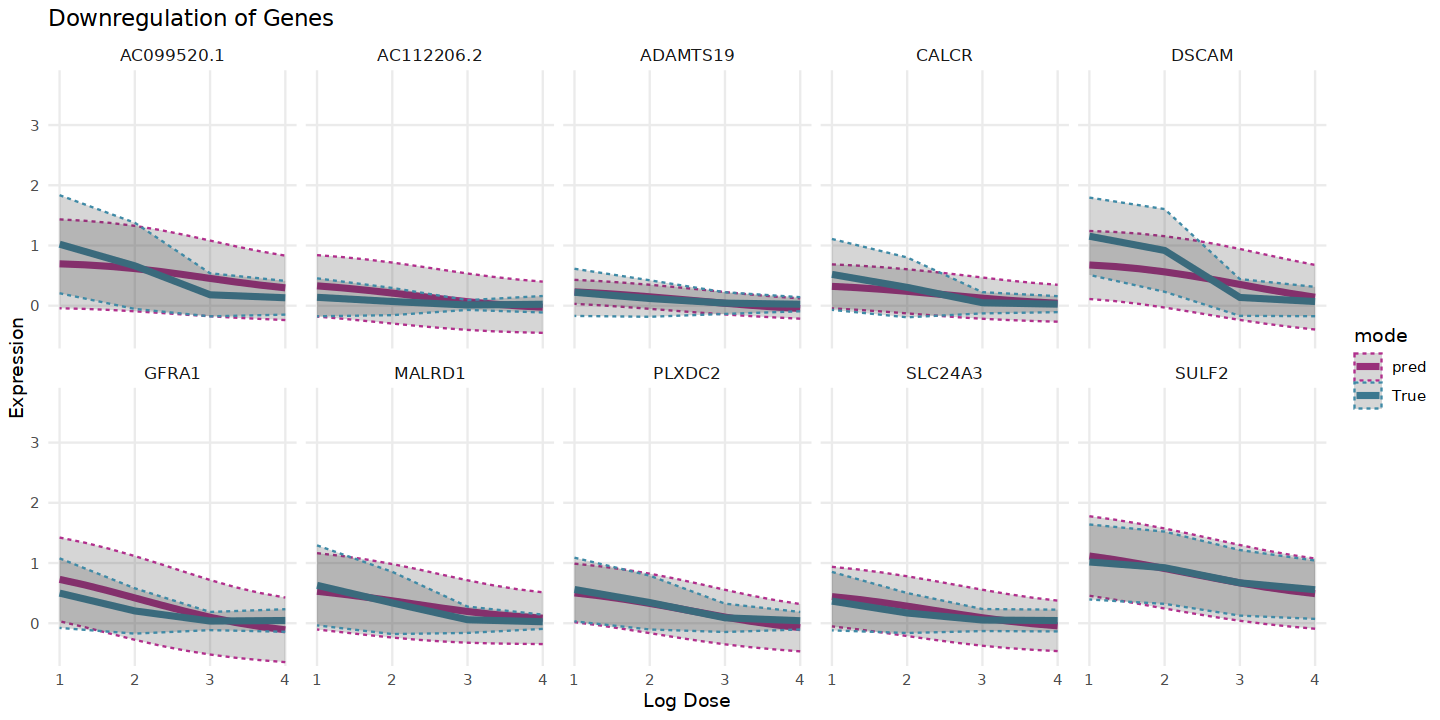

In [12]:
options(repr.plot.width = 12, repr.plot.height = 6)

# Plot
p <- ggplot(df_long, aes(x = logdose, y = expression, color = mode)) +
  geom_line(stat = "summary", fun = mean, size=1.5) +
  geom_ribbon(stat = "summary", fun.data = mean_sdl, fun.args = list(mult = 1), alpha = 0.2, linetype = "dashed") +
  facet_wrap(~ gene, ncol = 5) +
  theme_minimal() +
  labs(title = "Downregulation of Genes", x = "Log Dose", y = "Expression") +
  scale_color_manual(values = color_dict) +
  coord_cartesian(ylim = c(-0.5, 3.7)) +
  theme(
    strip.text = element_text(size = 10),
    panel.grid.major = element_line(size = 0.5), # Adjust major grid line size (thicker or thinner)
    panel.grid.minor = element_blank()          # Remove minor grid lines
  )
ggsave(file.path(output_dir, "downregulation_genes.pdf"), plot = p, device = "pdf", width = 12, height = 6)
p